In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Scan for Colombo CSV Files

In [2]:
import os

# Define the directory to search within your mounted Google Drive
drive_path = '/content/drive/My Drive/'

# Find all CSV files recursively within the drive
all_csv_files = []
for root, dirs, files in os.walk(drive_path):
    for file in files:
        if file.endswith('.csv'):
            all_csv_files.append(os.path.join(root, file))

# Filter for files containing 'colombo' in their name (case-insensitive)
colombo_files = [f for f in all_csv_files if 'colombo' in os.path.basename(f).lower()]

print(f"Found {len(colombo_files)} Colombo CSV files\n")
for f in sorted(colombo_files):
    print(f"  {f}")

Found 20 Colombo CSV files

  /content/drive/My Drive/Data (1)/Colombo 01  2024.csv
  /content/drive/My Drive/Data (1)/Colombo 01  2025.csv
  /content/drive/My Drive/Data (1)/Colombo 01 2021.csv
  /content/drive/My Drive/Data (1)/Colombo 01 2022.csv
  /content/drive/My Drive/Data (1)/Colombo 01 2023.csv
  /content/drive/My Drive/Data (1)/Colombo 02  2022.csv
  /content/drive/My Drive/Data (1)/Colombo 02  2023.csv
  /content/drive/My Drive/Data (1)/Colombo 02  2024.csv
  /content/drive/My Drive/Data (1)/Colombo 02  2025.csv
  /content/drive/My Drive/Data (1)/Colombo 03  2021.csv
  /content/drive/My Drive/Data (1)/Colombo 03 2022.csv
  /content/drive/My Drive/Data (1)/Colombo 03 2023.csv
  /content/drive/My Drive/Data (1)/Colombo 04  2023.csv
  /content/drive/My Drive/Data (1)/Colombo 04  2024.csv
  /content/drive/My Drive/Data (1)/Colombo 04  2025.csv
  /content/drive/My Drive/Data (1)/Colombo 04 2021.csv
  /content/drive/My Drive/Data (1)/Colombo 04 2022.csv
  /content/drive/My Drive/D

Load All CSV Files

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CELL 1b: LOAD ALL CSV FILES")
print("="*70)

# Load each file
all_data = []
print()
for filename in sorted(colombo_files):
    df = pd.read_csv(filename)

    # Extract region number (01, 02, 03, 04)
    parts = filename.replace('.csv', '').split()
    region_num = None
    year_num = None

    for part in parts:
        if part.isdigit() and len(part) == 2:
            region_num = part
        elif part.isdigit() and len(part) == 4:
            year_num = int(part)

    # Add metadata
    df['region'] = f'Colombo {region_num}'
    df['year'] = year_num

    all_data.append(df)
    print(f"✅ {filename}: {len(df)} records")

print("\n" + "="*70)

CELL 1b: LOAD ALL CSV FILES

✅ /content/drive/My Drive/Data (1)/Colombo 01  2024.csv: 366 records
✅ /content/drive/My Drive/Data (1)/Colombo 01  2025.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 01 2021.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 01 2022.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 01 2023.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 02  2022.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 02  2023.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 02  2024.csv: 366 records
✅ /content/drive/My Drive/Data (1)/Colombo 02  2025.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 03  2021.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 03 2022.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 03 2023.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 04  2023.csv: 365 records
✅ /content/drive/My Drive/Data (1)/Colombo 04  2024.csv: 366 records
✅ /content

Combine All Data

In [4]:
print("="*70)
print("CELL 1c: COMBINE ALL DATA")
print("="*70)

# Combine all dataframes
df_combined = pd.concat(all_data, ignore_index=True)

print(f"\nTotal records: {len(df_combined):,}")
print(f"Regions: {sorted(df_combined['region'].unique())}")
print(f"Years: {sorted(df_combined['year'].unique())}")

# Check coverage
print("\nData coverage by region and year:")
coverage = df_combined.groupby(['region', 'year']).size().reset_index(name='records')
for _, row in coverage.sort_values(['region', 'year']).iterrows():
    print(f"  {row['region']} {row['year']}: {row['records']} records")

print("\n" + "="*70)

CELL 1c: COMBINE ALL DATA

Total records: 7,304
Regions: ['Colombo 01', 'Colombo 02', 'Colombo 03', 'Colombo 04']
Years: [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]

Data coverage by region and year:
  Colombo 01 2021: 365 records
  Colombo 01 2022: 365 records
  Colombo 01 2023: 365 records
  Colombo 01 2024: 366 records
  Colombo 01 2025: 365 records
  Colombo 02 2021: 365 records
  Colombo 02 2022: 365 records
  Colombo 02 2023: 365 records
  Colombo 02 2024: 366 records
  Colombo 02 2025: 365 records
  Colombo 03 2021: 365 records
  Colombo 03 2022: 365 records
  Colombo 03 2023: 365 records
  Colombo 03 2024: 366 records
  Colombo 03 2025: 365 records
  Colombo 04 2021: 365 records
  Colombo 04 2022: 365 records
  Colombo 04 2023: 365 records
  Colombo 04 2024: 366 records
  Colombo 04 2025: 365 records



Clean and Prepare Data

In [5]:
print("="*70)
print("CELL 2: CHECK AVAILABLE VARIABLES")
print("="*70)

# Show all column names
print(f"\nTotal columns: {len(df_combined.columns)}")
print("\nAll variables in dataset:")
for i, col in enumerate(df_combined.columns, 1):
    print(f"  {i:2d}. {col}")

# Show sample of first row
print("\nSample data (first record):")
print(df_combined.iloc[0])

print("\n" + "="*70)

CELL 2: CHECK AVAILABLE VARIABLES

Total columns: 35

All variables in dataset:
   1. name
   2. datetime
   3. tempmax
   4. tempmin
   5. temp
   6. feelslikemax
   7. feelslikemin
   8. feelslike
   9. dew
  10. humidity
  11. precip
  12. precipprob
  13. precipcover
  14. preciptype
  15. snow
  16. snowdepth
  17. windgust
  18. windspeed
  19. winddir
  20. sealevelpressure
  21. cloudcover
  22. visibility
  23. solarradiation
  24. solarenergy
  25. uvindex
  26. severerisk
  27. sunrise
  28. sunset
  29. moonphase
  30. conditions
  31. description
  32. icon
  33. stations
  34. region
  35. year

Sample data (first record):
name                                                      Colombo 01 
datetime                                                     1/1/2024
tempmax                                                          84.3
tempmin                                                          75.3
temp                                                             78.9
feels

Correlation Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("="*70)
print("CELL 3: CORRELATION ANALYSIS WITH SOLAR ENERGY")
print("="*70)

# Select only numeric columns for correlation
numeric_cols = df_combined.select_dtypes(include=[np.number]).columns.tolist()

# Remove non-weather variables
exclude_cols = ['year', 'severerisk', 'moonphase', 'winddir']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Calculate correlation with solarenergy
correlations = df_combined[numeric_cols].corr()['solarenergy'].sort_values(ascending=False)

print("\nCorrelation with Solar Energy:")
print("="*70)
for var, corr in correlations.items():
    if var != 'solarenergy':
        if abs(corr) > 0.7:
            strength = "✅ VERY STRONG"
        elif abs(corr) > 0.5:
            strength = "✅ STRONG"
        elif abs(corr) > 0.3:
            strength = "⚠️  MODERATE"
        else:
            strength = "❌ WEAK"
        print(f"  {var:20s} {corr:>+.4f}  {strength}")

CELL 3: CORRELATION ANALYSIS WITH SOLAR ENERGY

Correlation with Solar Energy:
  solarradiation       +0.9997  ✅ VERY STRONG
  uvindex              +0.9206  ✅ VERY STRONG
  tempmax              +0.6284  ✅ STRONG
  temp                 +0.5321  ✅ STRONG
  feelslikemax         +0.4142  ⚠️  MODERATE
  feelslike            +0.4020  ⚠️  MODERATE
  sealevelpressure     +0.1779  ❌ WEAK
  visibility           +0.1060  ❌ WEAK
  feelslikemin         +0.0942  ❌ WEAK
  tempmin              +0.0646  ❌ WEAK
  snowdepth            -0.0282  ❌ WEAK
  dew                  -0.1362  ❌ WEAK
  windspeed            -0.1569  ❌ WEAK
  windgust             -0.2444  ❌ WEAK
  precip               -0.3825  ⚠️  MODERATE
  precipprob           -0.3861  ⚠️  MODERATE
  precipcover          -0.4230  ⚠️  MODERATE
  cloudcover           -0.5522  ✅ STRONG
  humidity             -0.5749  ✅ STRONG
  snow                 +nan  ❌ WEAK


Visual to show corelation

CELL 4d: SOLAR ENERGY CORRELATION BAR CHART

✅ Saved: Solar_Energy_Correlation_Bar.png


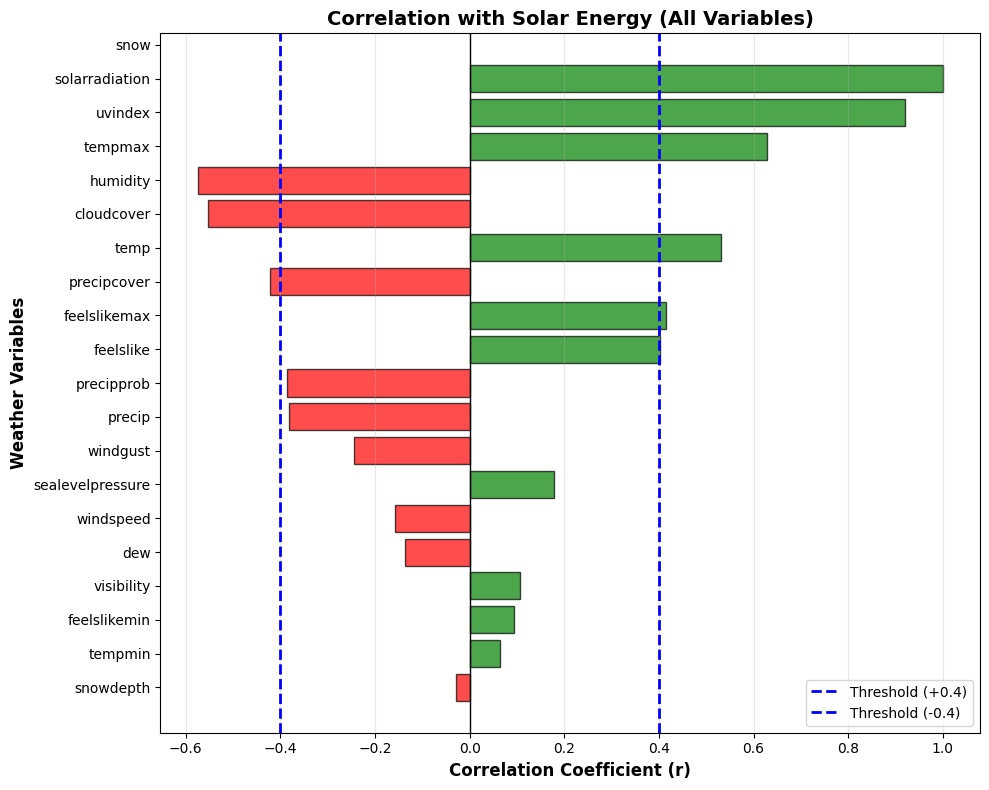

In [7]:
 import matplotlib.pyplot as plt

print("="*70)
print("CELL 4d: SOLAR ENERGY CORRELATION BAR CHART")
print("="*70)

# Get correlation with solar energy (already calculated earlier)
solar_corr = correlations.drop('solarenergy').sort_values(key=abs, ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in solar_corr.values]
plt.barh(solar_corr.index, solar_corr.values, color=colors, alpha=0.7, edgecolor='black')

# Add threshold lines
plt.axvline(x=0.4, color='blue', linestyle='--', linewidth=2, label='Threshold (+0.4)')
plt.axvline(x=-0.4, color='blue', linestyle='--', linewidth=2, label='Threshold (-0.4)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

plt.xlabel('Correlation Coefficient (r)', fontsize=12, fontweight='bold')
plt.ylabel('Weather Variables', fontsize=12, fontweight='bold')
plt.title('Correlation with Solar Energy (All Variables)',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('Solar_Energy_Correlation_Bar.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: Solar_Energy_Correlation_Bar.png")
plt.show()

print("\n" + "="*70)

In [8]:

print("CELL 4a: IDENTIFY VARIABLES ABOVE CORRELATION THRESHOLD")


# Set threshold
threshold = 0.4

# Get correlations above threshold (excluding solarenergy itself)
strong_vars = correlations[
    (correlations.abs() > threshold) &
    (correlations.index != 'solarenergy')
].sort_values(key=abs, ascending=False)

print(f"\nVariables with |r| > {threshold}:")
print("-"*70)
for var, corr in strong_vars.items():
    print(f"  {var:20s} {corr:>+.4f}")

print(f"\nTotal: {len(strong_vars)} variables pass threshold")


CELL 4a: IDENTIFY VARIABLES ABOVE CORRELATION THRESHOLD

Variables with |r| > 0.4:
----------------------------------------------------------------------
  solarradiation       +0.9997
  uvindex              +0.9206
  tempmax              +0.6284
  humidity             -0.5749
  cloudcover           -0.5522
  temp                 +0.5321
  precipcover          -0.4230
  feelslikemax         +0.4142
  feelslike            +0.4020

Total: 9 variables pass threshold


Remove Redundant Variables

In [9]:

print("CELL 4b: REMOVE REDUNDANT VARIABLES")


print("\n📋 DECISION LOGIC:")


# Variables that passed threshold
passed_vars = strong_vars.index.tolist()

# Variables to EXCLUDE (with reasons)
exclude_vars = {
    'solarradiation': 'Too similar to target (r=0.9997 - multicollinearity)',
    'tempmax': 'Redundant with temp (both measure temperature)',
    'feelslikemax': 'Derived from temp + humidity (redundant)',
    'feelslike': 'Derived from temp + humidity (redundant)'
}

# Variables to KEEP
keep_vars = [var for var in passed_vars if var not in exclude_vars]

print("\n❌ EXCLUDED Variables:")
for var, reason in exclude_vars.items():
    if var in passed_vars:
        print(f"  {var:20s} - {reason}")

print("\n✅ FINAL SELECTED PREDICTORS:")
print("-"*70)
for var in keep_vars:
    corr_val = correlations[var]
    print(f"  {var:20s} {corr_val:>+.4f}")

print(f"\nTotal predictors: {len(keep_vars)}")


CELL 4b: REMOVE REDUNDANT VARIABLES

📋 DECISION LOGIC:

❌ EXCLUDED Variables:
  solarradiation       - Too similar to target (r=0.9997 - multicollinearity)
  tempmax              - Redundant with temp (both measure temperature)
  feelslikemax         - Derived from temp + humidity (redundant)
  feelslike            - Derived from temp + humidity (redundant)

✅ FINAL SELECTED PREDICTORS:
----------------------------------------------------------------------
  uvindex              +0.9206
  humidity             -0.5749
  cloudcover           -0.5522
  temp                 +0.5321
  precipcover          -0.4230

Total predictors: 5


Create Final Dataset with Selected Variables

In [10]:
print("="*70)
print("CELL 4c: CREATE FINAL DATASET")
print("="*70)

# Create list of columns to keep
final_columns = [
    'datetime',
    'region',
    'year',
    'solarenergy',    # Target
    'uvindex',        # Predictor 1
    'humidity',       # Predictor 2
    'cloudcover',     # Predictor 3
    'temp',           # Predictor 4
    'precipcover'     # Predictor 5
]

# Create final dataset
df_final = df_combined[final_columns].copy()

# Convert datetime
df_final['datetime'] = pd.to_datetime(df_final['datetime'], format='mixed')

# Remove any missing values
df_final = df_final.dropna()

print(f"\n✅ Final dataset created")
print(f"   Shape: {df_final.shape[0]:,} records × {df_final.shape[1]} columns")
print(f"   Date range: {df_final['datetime'].min()} to {df_final['datetime'].max()}")
print(f"   Regions: {sorted(df_final['region'].unique())}")
print(f"   Years: {sorted(df_final['year'].unique())}")

print("\n📊 Variables in final dataset:")
for i, col in enumerate(final_columns, 1):
    print(f"   {i}. {col}")

print("\n" + "="*70)

CELL 4c: CREATE FINAL DATASET

✅ Final dataset created
   Shape: 7,304 records × 9 columns
   Date range: 2021-01-01 00:00:00 to 2025-12-31 00:00:00
   Regions: ['Colombo 01', 'Colombo 02', 'Colombo 03', 'Colombo 04']
   Years: [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]

📊 Variables in final dataset:
   1. datetime
   2. region
   3. year
   4. solarenergy
   5. uvindex
   6. humidity
   7. cloudcover
   8. temp
   9. precipcover



Spatial Analysis - Compare Regions

In [11]:
from scipy import stats

print("CELL 5: SPATIAL ANALYSIS - COMPARE REGIONS")

# Group by region
regions = sorted(df_final['region'].unique())

print(f"\nRegions to compare: {regions}")

# Calculate mean solar energy by region
print("\n📊 Mean Solar Energy by Region:")
print("-"*70)
for region in regions:
    region_data = df_final[df_final['region'] == region]['solarenergy']
    print(f"  {region}: {region_data.mean():.2f} MJ/m² (n={len(region_data)} records)")

# ANOVA test - are means significantly different?
region_groups = [df_final[df_final['region'] == r]['solarenergy'].values
                 for r in regions]

f_stat, p_value = stats.f_oneway(*region_groups)

print("\n📈 ANOVA TEST RESULTS:")
print("-"*70)
print(f"  F-statistic: {f_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Significance level: α = 0.05")

if p_value < 0.05:
    print("\n❌ RESULT: SIGNIFICANT DIFFERENCE (p < 0.05)")
    print("   → Regions have statistically different solar energy")
else:
    print("\n✅ RESULT: NO SIGNIFICANT DIFFERENCE (p > 0.05)")
    print("   → Regions are statistically similar")
    print("   → Justified to use single representative location")

print("\n" + "="*70)

CELL 5: SPATIAL ANALYSIS - COMPARE REGIONS

Regions to compare: ['Colombo 01', 'Colombo 02', 'Colombo 03', 'Colombo 04']

📊 Mean Solar Energy by Region:
----------------------------------------------------------------------
  Colombo 01: 18.59 MJ/m² (n=1826 records)
  Colombo 02: 18.59 MJ/m² (n=1826 records)
  Colombo 03: 18.59 MJ/m² (n=1826 records)
  Colombo 04: 18.59 MJ/m² (n=1826 records)

📈 ANOVA TEST RESULTS:
----------------------------------------------------------------------
  F-statistic: 0.0000
  p-value: 1.0000
  Significance level: α = 0.05

✅ RESULT: NO SIGNIFICANT DIFFERENCE (p > 0.05)
   → Regions are statistically similar
   → Justified to use single representative location



In [12]:

print("CELL 6: FILTER TO COLOMBO 04 ONLY")


# Filter to Colombo 04 only
df_colombo04 = df_final[df_final['region'] == 'Colombo 04'].copy()

# Reset index
df_colombo04 = df_colombo04.reset_index(drop=True)

# Sort by date
df_colombo04 = df_colombo04.sort_values('datetime').reset_index(drop=True)

print(f"\n✅ Filtered to Colombo 04")
print(f"   Records: {len(df_colombo04):,}")
print(f"   Date range: {df_colombo04['datetime'].min()} to {df_colombo04['datetime'].max()}")
print(f"   Years: {sorted(df_colombo04['year'].unique())}")

# Check data completeness
print("\n📊 Data by year:")
year_counts = df_colombo04.groupby('year').size()
for year, count in year_counts.items():
    print(f"   {year}: {count} records")

print("\n" + "="*70)

CELL 6: FILTER TO COLOMBO 04 ONLY

✅ Filtered to Colombo 04
   Records: 1,826
   Date range: 2021-01-01 00:00:00 to 2025-12-31 00:00:00
   Years: [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]

📊 Data by year:
   2021: 365 records
   2022: 365 records
   2023: 365 records
   2024: 366 records
   2025: 365 records



Double checking the variables

In [13]:
print("="*70)
print("CELL 7b: CHECK VARIABLES IN COLOMBO 04 DATASET")
print("="*70)

print(f"\nTotal columns: {len(df_colombo04.columns)}")
print("\nVariables in Colombo 04 dataset:")
for i, col in enumerate(df_colombo04.columns, 1):
    print(f"  {i}. {col}")

print("\n📊 Sample data (first 3 rows):")
print(df_colombo04.head(3))

print("\n📈 Data types:")
print(df_colombo04.dtypes)

print("\n" + "="*70)

CELL 7b: CHECK VARIABLES IN COLOMBO 04 DATASET

Total columns: 9

Variables in Colombo 04 dataset:
  1. datetime
  2. region
  3. year
  4. solarenergy
  5. uvindex
  6. humidity
  7. cloudcover
  8. temp
  9. precipcover

📊 Sample data (first 3 rows):
    datetime      region  year  solarenergy  uvindex  humidity  cloudcover  \
0 2021-01-01  Colombo 04  2021         16.2        7      81.8        73.6   
1 2021-01-02  Colombo 04  2021         14.4        7      77.3        70.5   
2 2021-01-03  Colombo 04  2021         15.7        7      82.1        68.8   

   temp  precipcover  
0  78.4        20.83  
1  80.8         0.00  
2  81.1         8.33  

📈 Data types:
datetime       datetime64[ns]
region                 object
year                    int64
solarenergy           float64
uvindex                 int64
humidity              float64
cloudcover            float64
temp                  float64
precipcover           float64
dtype: object



Feature Engineering

Extracting year and month

In [14]:
# Extract year and month from datetime
df_colombo04['year'] = df_colombo04['datetime'].dt.year
df_colombo04['month'] = df_colombo04['datetime'].dt.month

print(df_colombo04[['datetime', 'year', 'month']].head())

    datetime  year  month
0 2021-01-01  2021      1
1 2021-01-02  2021      1
2 2021-01-03  2021      1
3 2021-01-04  2021      1
4 2021-01-05  2021      1


Group by Year and Month

In [15]:
# Group by year and month
monthly_grouped = df_colombo04.groupby(['year', 'month'])

print(f"\n✅ Created {len(monthly_grouped)} monthly groups")

# Show how many records in each group
print("\n Records per month:")
group_counts = monthly_grouped.size().reset_index(name='daily_records')
print(group_counts.head(12))  # Show first 12 months


✅ Created 60 monthly groups

 Records per month:
    year  month  daily_records
0   2021      1             31
1   2021      2             28
2   2021      3             31
3   2021      4             30
4   2021      5             31
5   2021      6             30
6   2021      7             31
7   2021      8             31
8   2021      9             30
9   2021     10             31
10  2021     11             30
11  2021     12             31


Calculate Monthly Averages

In [16]:

print("CELL 8c: CALCULATE MONTHLY AVERAGES")


# Calculate monthly aggregations
monthly_data = df_colombo04.groupby(['year', 'month']).agg({
    'solarenergy': 'mean',
    'uvindex': 'mean',
    'cloudcover': 'mean',
    'humidity': 'mean',
    'temp': 'mean',
    'precipcover': 'sum'
}).reset_index()

print(f"   Total months: {len(monthly_data)}")

print("\n📊 Aggregation methods:")
print("   solarenergy  → MEAN")
print("   uvindex      → MEAN")
print("   cloudcover   → MEAN")
print("   humidity     → MEAN")
print("   temp         → MEAN")
print("   precipcover  → SUM")

print("\nFirst 5 months:")
print(monthly_data.head())



CELL 8c: CALCULATE MONTHLY AVERAGES
   Total months: 60

📊 Aggregation methods:
   solarenergy  → MEAN
   uvindex      → MEAN
   cloudcover   → MEAN
   humidity     → MEAN
   temp         → MEAN
   precipcover  → SUM

First 5 months:
   year  month  solarenergy   uvindex  cloudcover   humidity       temp  \
0  2021      1    16.764516  7.387097   57.470968  81.290323  80.090323   
1  2021      2    22.639286  9.071429   40.085714  73.339286  81.592857   
2  2021      3    20.680645  8.677419   50.670968  79.319355  81.900000   
3  2021      4    21.736667  8.800000   49.283333  79.040000  83.880000   
4  2021      5    17.354839  7.483871   62.006452  82.835484  83.025806   

   precipcover  
0       295.83  
1        79.18  
2       279.20  
3       262.49  
4       679.17  


Create Date Column

In [17]:

print("CELL 8d: CREATE DATE COLUMN")


# Create date column (first day of each month)
monthly_data['date'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))

print("\n✅ Date column created")

print("\nDataset preview:")
print(monthly_data[['date', 'year', 'month', 'solarenergy']].head())

print(f"\nDate range: {monthly_data['date'].min()} to {monthly_data['date'].max()}")

print("\n" + "="*70)

CELL 8d: CREATE DATE COLUMN

✅ Date column created

Dataset preview:
        date  year  month  solarenergy
0 2021-01-01  2021      1    16.764516
1 2021-02-01  2021      2    22.639286
2 2021-03-01  2021      3    20.680645
3 2021-04-01  2021      4    21.736667
4 2021-05-01  2021      5    17.354839

Date range: 2021-01-01 00:00:00 to 2025-12-01 00:00:00



In [18]:
print("="*70)
print("CELL 9: ADD SRI LANKAN MONSOON SEASONS")
print("="*70)

# Define season assignment function
def assign_season(month):
    if month in [12, 1, 2]:
        return 'NE Monsoon'
    elif month in [3, 4]:
        return 'Inter-Monsoon 1'
    elif month in [5, 6, 7, 8, 9]:
        return 'SW Monsoon'
    else:  # 10, 11
        return 'Inter-Monsoon 2'

# Apply season assignment
monthly_data['season'] = monthly_data['month'].apply(assign_season)

print("\n✅ Monsoon seasons added")

print("\n🌦️ Season definitions:")
print("   NE Monsoon       (Dec-Feb)")
print("   Inter-Monsoon 1  (Mar-Apr)")
print("   SW Monsoon       (May-Sep)")
print("   Inter-Monsoon 2  (Oct-Nov)")

print("\nDataset preview:")
print(monthly_data[['date', 'month', 'season', 'solarenergy']].head(12))

print(f"\n📊 Records by season:")
season_counts = monthly_data['season'].value_counts()
for season, count in season_counts.items():
    print(f"   {season:20s} {count} months")

print("\n" + "="*70)

CELL 9: ADD SRI LANKAN MONSOON SEASONS

✅ Monsoon seasons added

🌦️ Season definitions:
   NE Monsoon       (Dec-Feb)
   Inter-Monsoon 1  (Mar-Apr)
   SW Monsoon       (May-Sep)
   Inter-Monsoon 2  (Oct-Nov)

Dataset preview:
         date  month           season  solarenergy
0  2021-01-01      1       NE Monsoon    16.764516
1  2021-02-01      2       NE Monsoon    22.639286
2  2021-03-01      3  Inter-Monsoon 1    20.680645
3  2021-04-01      4  Inter-Monsoon 1    21.736667
4  2021-05-01      5       SW Monsoon    17.354839
5  2021-06-01      6       SW Monsoon    18.666667
6  2021-07-01      7       SW Monsoon    18.048387
7  2021-08-01      8       SW Monsoon    17.945161
8  2021-09-01      9       SW Monsoon    18.566667
9  2021-10-01     10  Inter-Monsoon 2    16.309677
10 2021-11-01     11  Inter-Monsoon 2    13.816667
11 2021-12-01     12       NE Monsoon    19.296774

📊 Records by season:
   SW Monsoon           25 months
   NE Monsoon           15 months
   Inter-Monsoon 1   


✅ Saved: Solar_Energy_by_Monsoon_Season.png


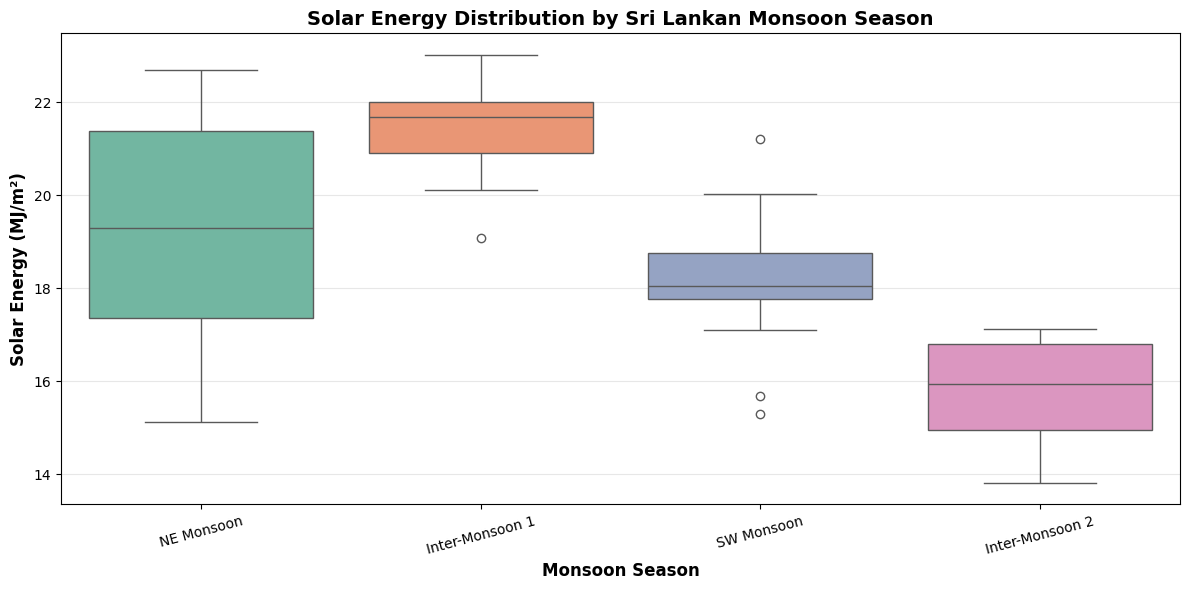

In [19]:
# Set season order
season_order = ['NE Monsoon', 'Inter-Monsoon 1', 'SW Monsoon', 'Inter-Monsoon 2']

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_data, x='season', y='solarenergy',
            order=season_order, palette='Set2')

plt.xlabel('Monsoon Season', fontsize=12, fontweight='bold')
plt.ylabel('Solar Energy (MJ/m²)', fontsize=12, fontweight='bold')
plt.title('Solar Energy Distribution by Sri Lankan Monsoon Season',
          fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('Solar_Energy_by_Monsoon_Season.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: Solar_Energy_by_Monsoon_Season.png")
plt.show()

Save Clean Monthly Dataset

In [20]:
print("CELL 10: SAVE CLEAN MONTHLY DATASET")


# Save to CSV
monthly_data.to_csv('monthly_dataset_colombo04.csv', index=False)

print("\n✅ Dataset saved: monthly_dataset_colombo04.csv")

print(f"\n📊 Final dataset summary:")
print(f"   Records: {len(monthly_data)}")
print(f"   Variables: {len(monthly_data.columns)}")
print(f"   Date range: {monthly_data['date'].min().date()} to {monthly_data['date'].max().date()}")

print("\n📋 Variables in dataset:")
for i, col in enumerate(monthly_data.columns, 1):
    print(f"   {i}. {col}")



CELL 10: SAVE CLEAN MONTHLY DATASET

✅ Dataset saved: monthly_dataset_colombo04.csv

📊 Final dataset summary:
   Records: 60
   Variables: 10
   Date range: 2021-01-01 to 2025-12-01

📋 Variables in dataset:
   1. year
   2. month
   3. solarenergy
   4. uvindex
   5. cloudcover
   6. humidity
   7. temp
   8. precipcover
   9. date
   10. season


# ***Exploratory Data Analysis***

Monthly Solar Energy Time Series


📊 Solar Energy Statistics:
   Mean:  18.61 MJ/m²
   Min:   13.82 MJ/m²
   Max:   23.02 MJ/m²
   Range: 9.20 MJ/m²

✅ Saved: Monthly_Solar_Energy_Timeseries.png


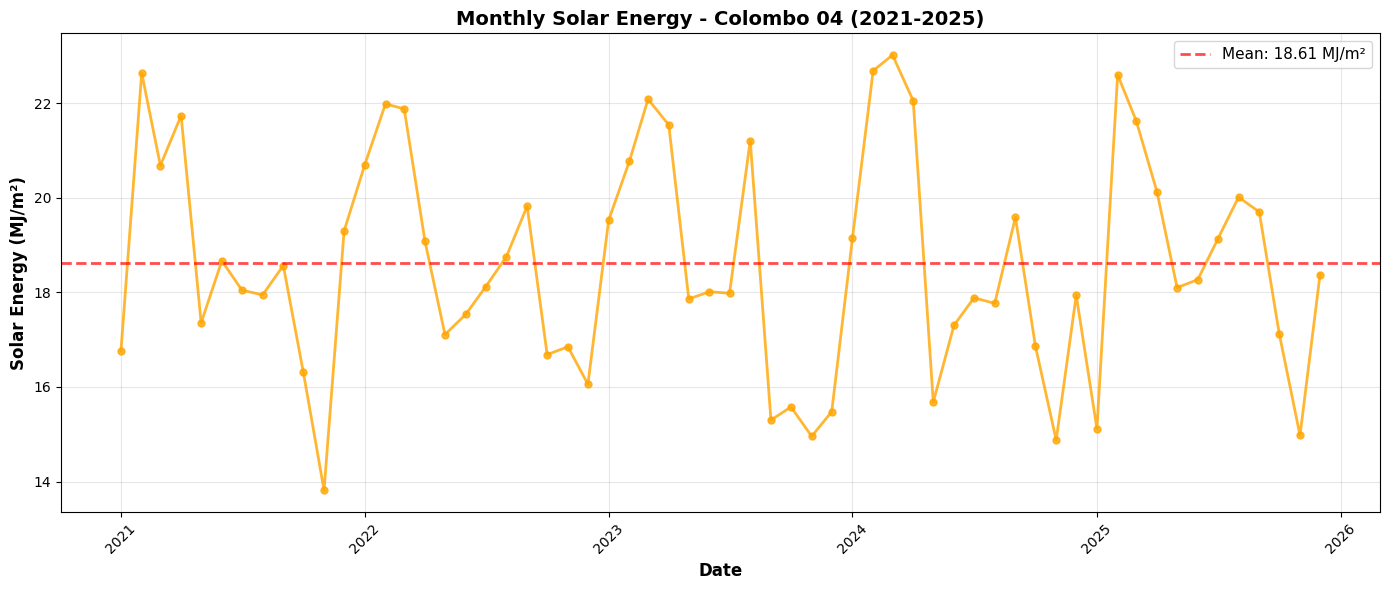

In [21]:
import matplotlib.pyplot as plt


# Calculate basic statistics
mean_solar = monthly_data['solarenergy'].mean()
min_solar = monthly_data['solarenergy'].min()
max_solar = monthly_data['solarenergy'].max()

print(f"\n📊 Solar Energy Statistics:")
print(f"   Mean:  {mean_solar:.2f} MJ/m²")
print(f"   Min:   {min_solar:.2f} MJ/m²")
print(f"   Max:   {max_solar:.2f} MJ/m²")
print(f"   Range: {max_solar - min_solar:.2f} MJ/m²")

# Create time series plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_data['date'], monthly_data['solarenergy'],
         'o-', linewidth=2, markersize=5, color='orange', alpha=0.8)
plt.axhline(y=mean_solar, color='red', linestyle='--',
            linewidth=2, alpha=0.7, label=f'Mean: {mean_solar:.2f} MJ/m²')

plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Solar Energy (MJ/m²)', fontsize=12, fontweight='bold')
plt.title('Monthly Solar Energy - Colombo 04 (2021-2025)',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Monthly_Solar_Energy_Timeseries.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: Monthly_Solar_Energy_Timeseries.png")
plt.show()


Monthly Patterns (Jan-Dec)


📊 Average Solar Energy by Month:
   Jan: 18.25 MJ/m²
   Feb: 22.14 MJ/m²
   Mar: 21.86 MJ/m²
   Apr: 20.91 MJ/m²
   May: 17.22 MJ/m²
   Jun: 17.96 MJ/m²
   Jul: 18.23 MJ/m²
   Aug: 19.14 MJ/m²
   Sep: 18.60 MJ/m²
   Oct: 16.51 MJ/m²
   Nov: 15.10 MJ/m²
   Dec: 17.43 MJ/m²

☀️  Highest: Feb (22.14 MJ/m²)
☁️  Lowest:  Nov (15.10 MJ/m²)


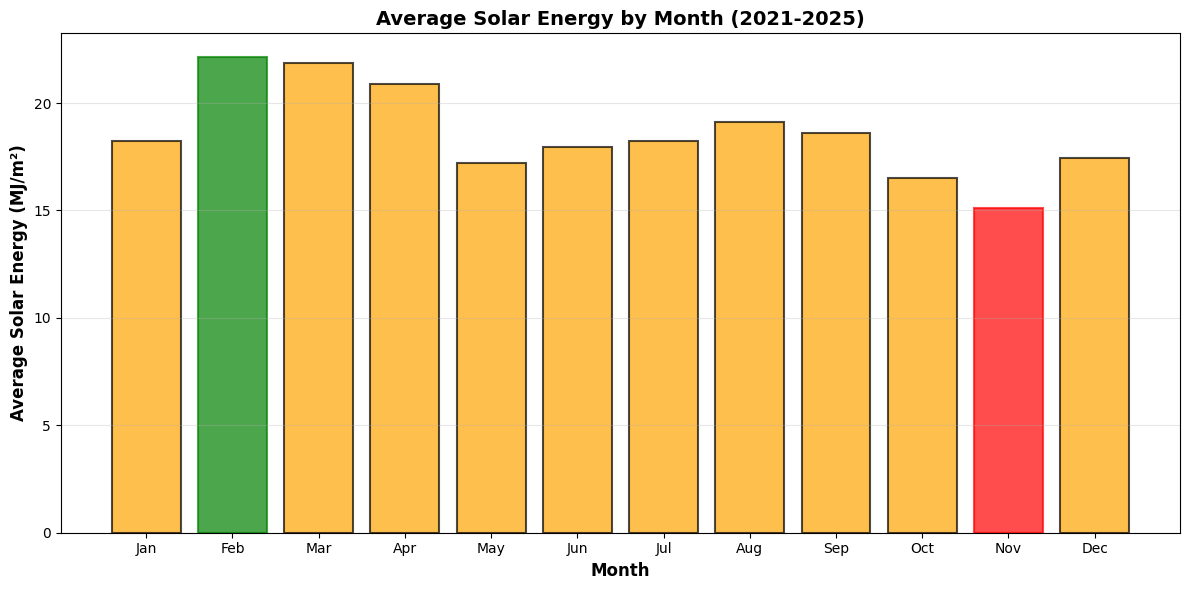

In [22]:

# Calculate average solar energy for each calendar month
monthly_avg = monthly_data.groupby('month')['solarenergy'].mean().sort_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("\n📊 Average Solar Energy by Month:")

for month, avg in monthly_avg.items():
    print(f"   {month_names[month-1]:3s}: {avg:.2f} MJ/m²")

# Find highest and lowest months
max_month = monthly_avg.idxmax()
min_month = monthly_avg.idxmin()

print(f"\n☀️  Highest: {month_names[max_month-1]} ({monthly_avg[max_month]:.2f} MJ/m²)")
print(f"☁️  Lowest:  {month_names[min_month-1]} ({monthly_avg[min_month]:.2f} MJ/m²)")

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(1, 13), monthly_avg.values, color='orange',
               alpha=0.7, edgecolor='black', linewidth=1.5)

# Highlight highest and lowest
bars[max_month-1].set_color('green')
bars[min_month-1].set_color('red')

plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average Solar Energy (MJ/m²)', fontsize=12, fontweight='bold')
plt.title('Average Solar Energy by Month (2021-2025)',
          fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), month_names)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('Monthly_Pattern_Jan_Dec.png', dpi=300, bbox_inches='tight')
plt.show()


Year-over-Year Comparison


📊 Solar Energy by Year:
   2021: Mean = 18.49 MJ/m²  Std = 2.42  Months = 12
   2022: Mean = 18.71 MJ/m²  Std = 2.02  Months = 12
   2023: Mean = 18.36 MJ/m²  Std = 2.64  Months = 12
   2024: Mean = 18.73 MJ/m²  Std = 2.66  Months = 12
   2025: Mean = 18.76 MJ/m²  Std = 2.31  Months = 12


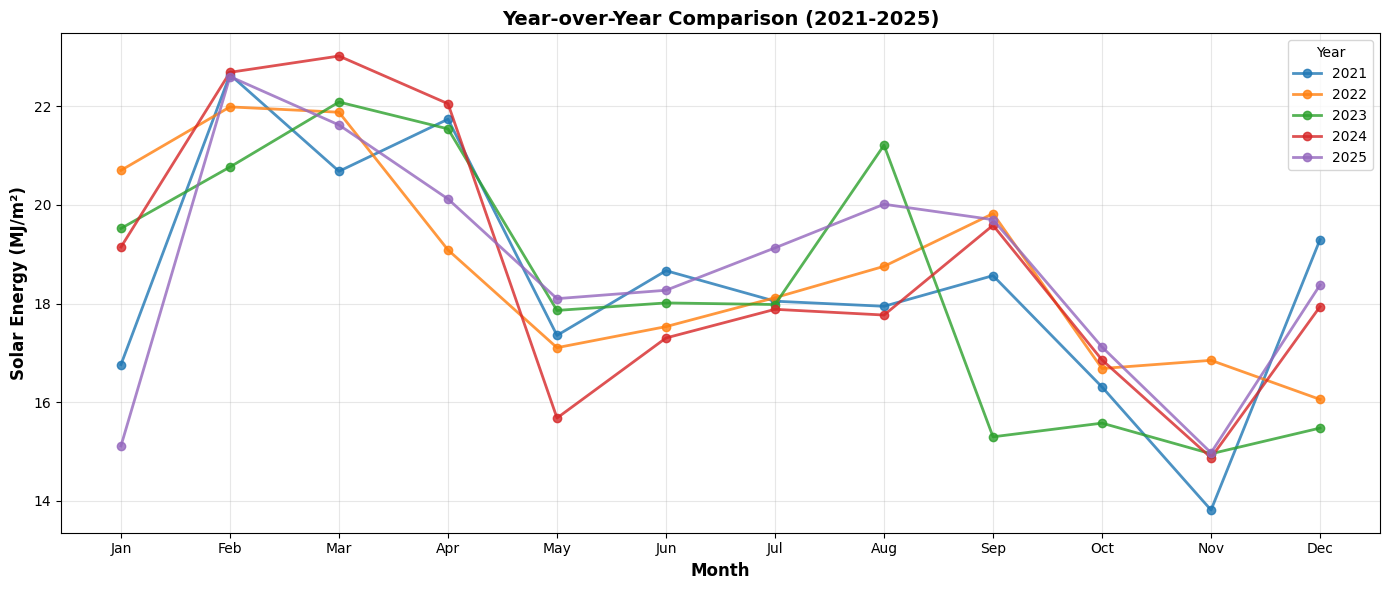

In [23]:
# Calculate average solar energy by year
yearly_avg = monthly_data.groupby('year')['solarenergy'].agg(['mean', 'std', 'count'])

print("\n📊 Solar Energy by Year:")
for year, row in yearly_avg.iterrows():
    print(f"   {year}: Mean = {row['mean']:.2f} MJ/m²  "
          f"Std = {row['std']:.2f}  Months = {int(row['count'])}")

# Create line plot for each year
plt.figure(figsize=(14, 6))

for year in sorted(monthly_data['year'].unique()):
    year_data = monthly_data[monthly_data['year'] == year].sort_values('month')
    plt.plot(year_data['month'], year_data['solarenergy'],
             'o-', linewidth=2, markersize=6, label=str(year), alpha=0.8)

plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Solar Energy (MJ/m²)', fontsize=12, fontweight='bold')
plt.title('Year-over-Year Comparison (2021-2025)',
          fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Year_over_Year_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()


Distribution Analysis


 Distribution Statistics:
   Mean:     18.61 MJ/m²
   Median:   18.19 MJ/m²
   Std Dev:  2.34 MJ/m²
   Skewness: 0.120
   → Distribution is approximately symmetric


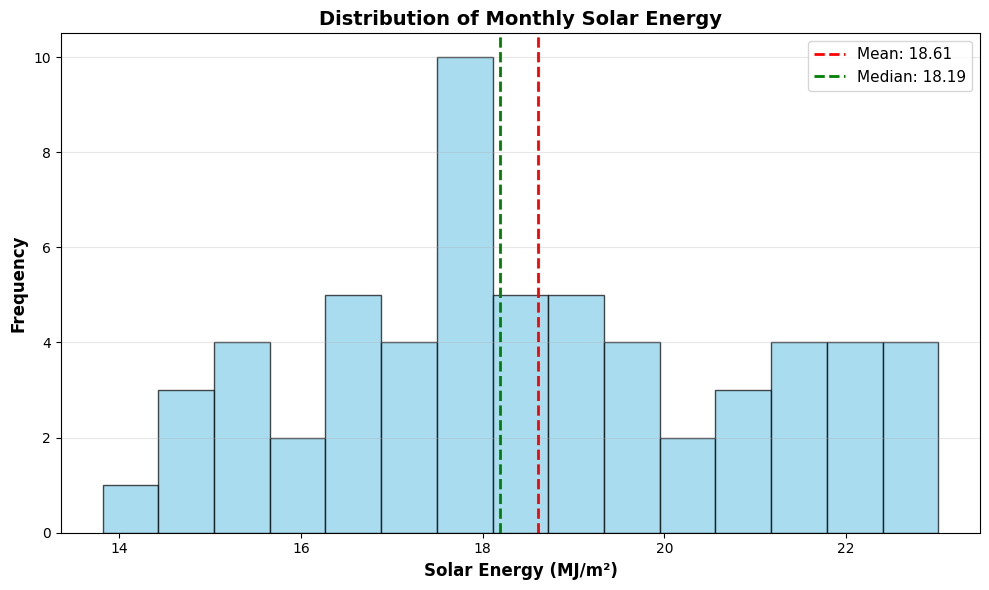

In [24]:
# Calculate distribution statistics
mean = monthly_data['solarenergy'].mean()
median = monthly_data['solarenergy'].median()
std = monthly_data['solarenergy'].std()
skewness = monthly_data['solarenergy'].skew()

print("\n Distribution Statistics:")
print(f"   Mean:     {mean:.2f} MJ/m²")
print(f"   Median:   {median:.2f} MJ/m²")
print(f"   Std Dev:  {std:.2f} MJ/m²")
print(f"   Skewness: {skewness:.3f}")

if abs(skewness) < 0.5:
    print("   → Distribution is approximately symmetric")
elif skewness > 0:
    print("   → Distribution is right-skewed (positive skew)")
else:
    print("   → Distribution is left-skewed (negative skew)")

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(monthly_data['solarenergy'], bins=15,
         color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=mean, color='red', linestyle='--',
            linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(x=median, color='green', linestyle='--',
            linewidth=2, label=f'Median: {median:.2f}')

plt.xlabel('Solar Energy (MJ/m²)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Monthly Solar Energy',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('Solar_Energy_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Autocorrelation Analysis - Solar Energy


 Saved: ACF_PACF_Solar_Energy.png


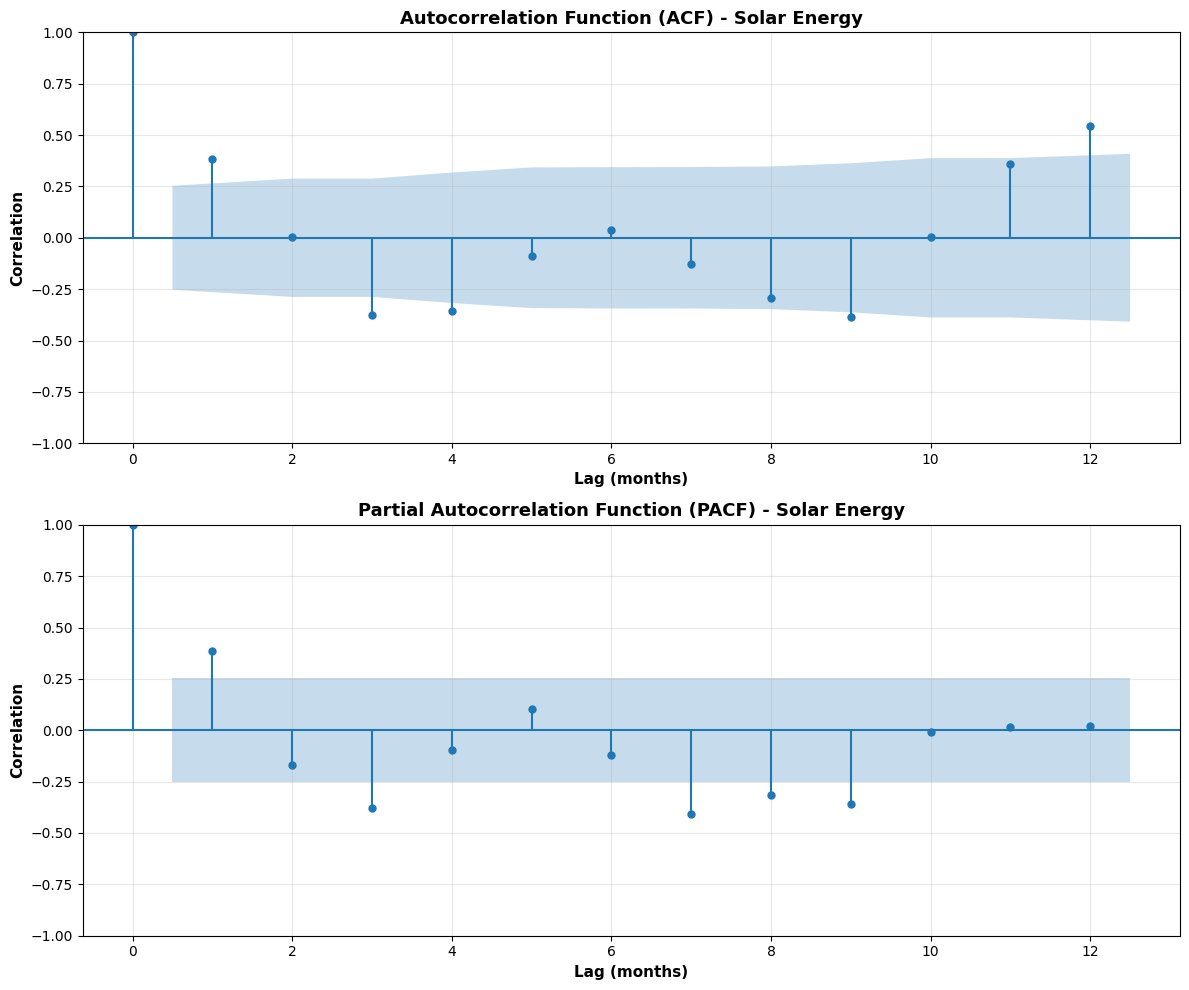


 INTERPRETATION GUIDE:
   Blue shaded area = 95% confidence interval
   Bars outside blue = Statistically significant correlation
   Lag 1 = correlation with 1 month ago
   Lag 12 = correlation with same month last year


In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot ACF
plot_acf(monthly_data['solarenergy'], lags=12, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF) - Solar Energy',
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Lag (months)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Correlation', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot PACF
plot_pacf(monthly_data['solarenergy'], lags=12, ax=axes[1], alpha=0.05)
axes[1].set_title('Partial Autocorrelation Function (PACF) - Solar Energy',
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Lag (months)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Correlation', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ACF_PACF_Solar_Energy.png', dpi=300, bbox_inches='tight')
print("\n Saved: ACF_PACF_Solar_Energy.png")
plt.show()

print("\n INTERPRETATION GUIDE:")
print("   Blue shaded area = 95% confidence interval")
print("   Bars outside blue = Statistically significant correlation")
print("   Lag 1 = correlation with 1 month ago")
print("   Lag 12 = correlation with same month last year")

In [26]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_data['solarenergy'])

print("\n AUGMENTED DICKEY-FULLER TEST:")
print("-"*70)
print(f"   ADF Statistic:  {adf_result[0]:.4f}")
print(f"   p-value:        {adf_result[1]:.4f}")
print(f"\n   Critical Values:")
for key, value in adf_result[4].items():
    print(f"      {key:>4s}: {value:.4f}")

# Interpretation
print("\n INTERPRETATION:")
print("-"*70)
if adf_result[1] < 0.05:
    print(f"    p-value ({adf_result[1]:.4f}) < 0.05")
    print("   \u2192 REJECT null hypothesis")
    print("   \u2192 Time series is STATIONARY")
    print("   \u2192 Mean and variance are constant over time")
    print("   \u2192  Suitable for regression-based forecasting")
else:
    print(f"     p-value ({adf_result[1]:.4f}) > 0.05")
    print("   \u2192 FAIL TO REJECT null hypothesis")
    print("   \u2192 Time series is NON-STATIONARY")
    print("   \u2192 Contains trend or significant seasonality")


 AUGMENTED DICKEY-FULLER TEST:
----------------------------------------------------------------------
   ADF Statistic:  -7.0345
   p-value:        0.0000

   Critical Values:
        1%: -3.5656
        5%: -2.9201
       10%: -2.5980

 INTERPRETATION:
----------------------------------------------------------------------
    p-value (0.0000) < 0.05
   → REJECT null hypothesis
   → Time series is STATIONARY
   → Mean and variance are constant over time
   →  Suitable for regression-based forecasting


# ***Machine Learning Model Development***

 Define Features and Target

In [27]:
# Define features (predictors)
feature_columns = ['uvindex', 'cloudcover', 'humidity', 'temp', 'precipcover']

# Define target (what we predict)
target_column = 'solarenergy'

print("\n Features (X):")
for i, col in enumerate(feature_columns, 1):
    print(f"   {i}. {col}")

print(f"\n Target (y): {target_column}")



 Features (X):
   1. uvindex
   2. cloudcover
   3. humidity
   4. temp
   5. precipcover

 Target (y): solarenergy


In [28]:
# Create feature matrix (X)
X = monthly_data[feature_columns]

# Create target vector (y)
y = monthly_data[target_column]

print(f"\n✅ X (Features):")
print(f"   Shape: {X.shape[0]} rows × {X.shape[1]} columns")
print("\nFirst 3 rows:")
print(X.head(3))

print(f"\n✅ y (Target):")
print(f"   Shape: {y.shape[0]} values")
print("\nFirst 3 values:")
print(y.head(3))



✅ X (Features):
   Shape: 60 rows × 5 columns

First 3 rows:
    uvindex  cloudcover   humidity       temp  precipcover
0  7.387097   57.470968  81.290323  80.090323       295.83
1  9.071429   40.085714  73.339286  81.592857        79.18
2  8.677419   50.670968  79.319355  81.900000       279.20

✅ y (Target):
   Shape: 60 values

First 3 values:
0    16.764516
1    22.639286
2    20.680645
Name: solarenergy, dtype: float64


Split into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("\n Data split complete")
print(f"\n Training set:")
print(f"   X_train: {X_train.shape[0]} samples")
print(f"   y_train: {y_train.shape[0]} samples")

print(f"\n Testing set:")
print(f"   X_test: {X_test.shape[0]} samples")
print(f"   y_test: {y_test.shape[0]} samples")

print(f"\n Split ratio:")
print(f"   Training: {len(X_train)/len(X)*100:.1f}%")
print(f"   Testing:  {len(X_test)/len(X)*100:.1f}%")



 Data split complete

 Training set:
   X_train: 48 samples
   y_train: 48 samples

 Testing set:
   X_test: 12 samples
   y_test: 12 samples

 Split ratio:
   Training: 80.0%
   Testing:  20.0%


**Train Linear Regression Model**

Initialize Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

# Create model
model_lr = LinearRegression()

print("\n Linear Regression model initialized")



 Linear Regression model initialized


Train Linear Regression

In [31]:
# Train model on training data
model_lr.fit(X_train, y_train)

print("\n Model training complete")
print(f"   Trained on {len(X_train)} samples")
print(f"   Using {X_train.shape[1]} features")



 Model training complete
   Trained on 48 samples
   Using 5 features


Make Predictions

In [32]:
# Predict on training set
y_pred_train = model_lr.predict(X_train)

# Predict on testing set
y_pred_test = model_lr.predict(X_test)

print("\n Predictions generated")
print(f"   Training predictions: {len(y_pred_train)}")
print(f"   Testing predictions: {len(y_pred_test)}")

print("\nFirst 3 predictions (test set):")
for i in range(min(3, len(y_test))):
    print(f"   Actual: {y_test.iloc[i]:.2f} MJ/m²  →  Predicted: {y_pred_test[i]:.2f} MJ/m²")



 Predictions generated
   Training predictions: 48
   Testing predictions: 12

First 3 predictions (test set):
   Actual: 16.76 MJ/m²  →  Predicted: 16.99 MJ/m²
   Actual: 18.67 MJ/m²  →  Predicted: 18.16 MJ/m²
   Actual: 19.15 MJ/m²  →  Predicted: 19.02 MJ/m²


Calculate Performance Metrics

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Training metrics
train_r2 = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Testing metrics
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n LINEAR REGRESSION PERFORMANCE:")
print(f"   TRAINING SET:")
print(f"      R²   = {train_r2:.4f}")
print(f"      MAE  = {train_mae:.3f} MJ/m²")
print(f"      RMSE = {train_rmse:.3f} MJ/m²")

print(f"\n   TESTING SET:")
print(f"      R²   = {test_r2:.4f}")
print(f"      MAE  = {test_mae:.3f} MJ/m²")
print(f"      RMSE = {test_rmse:.3f} MJ/m²")

print(f"\n   Overfitting gap: {train_r2 - test_r2:.4f}")



 LINEAR REGRESSION PERFORMANCE:
   TRAINING SET:
      R²   = 0.9693
      MAE  = 0.318 MJ/m²
      RMSE = 0.403 MJ/m²

   TESTING SET:
      R²   = 0.9777
      MAE  = 0.313 MJ/m²
      RMSE = 0.352 MJ/m²

   Overfitting gap: -0.0084


**Initialize Decision Tree Model**

In [34]:
from sklearn.tree import DecisionTreeRegressor


# Create Decision Tree model
model_dt = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

print("\n Decision Tree model initialized")
print("   Parameters:")
print("      max_depth = 5")
print("      min_samples_split = 5")
print("      min_samples_leaf = 2")



 Decision Tree model initialized
   Parameters:
      max_depth = 5
      min_samples_split = 5
      min_samples_leaf = 2


Train Decision Tree Model

In [35]:
# Train model
model_dt.fit(X_train, y_train)

print("\n Decision Tree training complete")
print(f" Trained on {len(X_train)} samples")



 Decision Tree training complete
 Trained on 48 samples


In [36]:
# Make predictions
y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

# Calculate metrics
train_r2_dt = r2_score(y_train, y_pred_train_dt)
train_mae_dt = mean_absolute_error(y_train, y_pred_train_dt)
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))

test_r2_dt = r2_score(y_test, y_pred_test_dt)
test_mae_dt = mean_absolute_error(y_test, y_pred_test_dt)
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))

print("\n DECISION TREE PERFORMANCE:")

print(f"   TRAINING SET:")
print(f"      R²   = {train_r2_dt:.4f}")
print(f"      MAE  = {train_mae_dt:.3f} MJ/m²")
print(f"      RMSE = {train_rmse_dt:.3f} MJ/m²")

print(f"\n   TESTING SET:")
print(f"      R²   = {test_r2_dt:.4f}")
print(f"      MAE  = {test_mae_dt:.3f} MJ/m²")
print(f"      RMSE = {test_rmse_dt:.3f} MJ/m²")

print(f"\n   Overfitting gap: {train_r2_dt - test_r2_dt:.4f}")


 DECISION TREE PERFORMANCE:
   TRAINING SET:
      R²   = 0.9814
      MAE  = 0.217 MJ/m²
      RMSE = 0.314 MJ/m²

   TESTING SET:
      R²   = 0.9203
      MAE  = 0.531 MJ/m²
      RMSE = 0.665 MJ/m²

   Overfitting gap: 0.0611


Initialize Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestRegressor


# Create Random Forest model
model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("\n Random Forest model initialized")
print("   Parameters:")
print("   n_estimators = 100")
print("   max_depth = 5")
print("   min_samples_split = 5")



 Random Forest model initialized
   Parameters:
   n_estimators = 100
   max_depth = 5
   min_samples_split = 5


Train Random Forest Model

In [38]:
# Train model
model_rf.fit(X_train, y_train)

print("\n Random Forest training complete")
print(f"  Trained 100 trees on {len(X_train)} samples")



 Random Forest training complete
  Trained 100 trees on 48 samples


Random Forest Predictions & Metrics

In [39]:
# Make predictions
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

# Calculate metrics
train_r2_rf = r2_score(y_train, y_pred_train_rf)
train_mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))

test_r2_rf = r2_score(y_test, y_pred_test_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

print("\n RANDOM FOREST PERFORMANCE:")
print(f"   TRAINING SET:")
print(f"      R²   = {train_r2_rf:.4f}")
print(f"      MAE  = {train_mae_rf:.3f} MJ/m²")
print(f"      RMSE = {train_rmse_rf:.3f} MJ/m²")

print(f"\n   TESTING SET:")
print(f"      R²   = {test_r2_rf:.4f}")
print(f"      MAE  = {test_mae_rf:.3f} MJ/m²")
print(f"      RMSE = {test_rmse_rf:.3f} MJ/m²")

print(f"\n   Overfitting gap: {train_r2_rf - test_r2_rf:.4f}")


 RANDOM FOREST PERFORMANCE:
   TRAINING SET:
      R²   = 0.9820
      MAE  = 0.224 MJ/m²
      RMSE = 0.309 MJ/m²

   TESTING SET:
      R²   = 0.9507
      MAE  = 0.447 MJ/m²
      RMSE = 0.523 MJ/m²

   Overfitting gap: 0.0313


Initialize Gradient Boosting Model

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting model
model_gb = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

print("\n Gradient Boosting model initialized")
print("   Parameters:")
print("   n_estimators = 100")
print("   max_depth = 4")
print("   learning_rate = 0.1")



 Gradient Boosting model initialized
   Parameters:
   n_estimators = 100
   max_depth = 4
   learning_rate = 0.1


Train Gradient Boosting Model

In [41]:
# Train model
model_gb.fit(X_train, y_train)

print("\n Gradient Boosting training complete")
print(f"  Trained 100 boosting stages on {len(X_train)} samples")



 Gradient Boosting training complete
  Trained 100 boosting stages on 48 samples


Gradient Boosting Predictions & Metrics

In [42]:
# Make predictions
y_pred_train_gb = model_gb.predict(X_train)
y_pred_test_gb = model_gb.predict(X_test)

# Calculate metrics
train_r2_gb = r2_score(y_train, y_pred_train_gb)
train_mae_gb = mean_absolute_error(y_train, y_pred_train_gb)
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_pred_train_gb))

test_r2_gb = r2_score(y_test, y_pred_test_gb)
test_mae_gb = mean_absolute_error(y_test, y_pred_test_gb)
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))

print("\n GRADIENT BOOSTING PERFORMANCE:")
print(f"   TRAINING SET:")
print(f"      R²   = {train_r2_gb:.4f}")
print(f"      MAE  = {train_mae_gb:.3f} MJ/m²")
print(f"      RMSE = {train_rmse_gb:.3f} MJ/m²")

print(f"\n   TESTING SET:")
print(f"      R²   = {test_r2_gb:.4f}")
print(f"      MAE  = {test_mae_gb:.3f} MJ/m²")
print(f"      RMSE = {test_rmse_gb:.3f} MJ/m²")

print(f"\n   Overfitting gap: {train_r2_gb - test_r2_gb:.4f}")



 GRADIENT BOOSTING PERFORMANCE:
   TRAINING SET:
      R²   = 1.0000
      MAE  = 0.002 MJ/m²
      RMSE = 0.002 MJ/m²

   TESTING SET:
      R²   = 0.9407
      MAE  = 0.495 MJ/m²
      RMSE = 0.574 MJ/m²

   Overfitting gap: 0.0593


Model Comparison Summary

In [43]:
import pandas as pd
# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Train_R2': [train_r2, train_r2_dt, train_r2_rf, train_r2_gb],
    'Test_R2': [test_r2, test_r2_dt, test_r2_rf, test_r2_gb],
    'Test_MAE': [test_mae, test_mae_dt, test_mae_rf, test_mae_gb],
    'Test_RMSE': [test_rmse, test_rmse_dt, test_rmse_rf, test_rmse_gb],
    'Overfitting_Gap': [
        train_r2 - test_r2,
        train_r2_dt - test_r2_dt,
        train_r2_rf - test_r2_rf,
        train_r2_gb - test_r2_gb
    ]
})

# Sort by Test R²
comparison = comparison.sort_values('Test_R2', ascending=False).reset_index(drop=True)

print("\n MODEL PERFORMANCE RANKING (by Test R²):")
print(comparison.to_string(index=False))

# Identify best model
best_model = comparison.iloc[0]['Model']
best_r2 = comparison.iloc[0]['Test_R2']

print("\n" + "="*70)
print(f" BEST MODEL: {best_model}")
print(f"   Test R² = {best_r2:.4f}")



 MODEL PERFORMANCE RANKING (by Test R²):
            Model  Train_R2  Test_R2  Test_MAE  Test_RMSE  Overfitting_Gap
Linear Regression  0.969329 0.977702  0.313139   0.351919        -0.008374
    Random Forest  0.981998 0.950707  0.446819   0.523245         0.031291
Gradient Boosting  0.999999 0.940700  0.495153   0.573904         0.059299
    Decision Tree  0.981362 0.920287  0.530668   0.665390         0.061075

 BEST MODEL: Linear Regression
   Test R² = 0.9777


 Model Comparison Visualization


 Saved: Model_Comparison.png


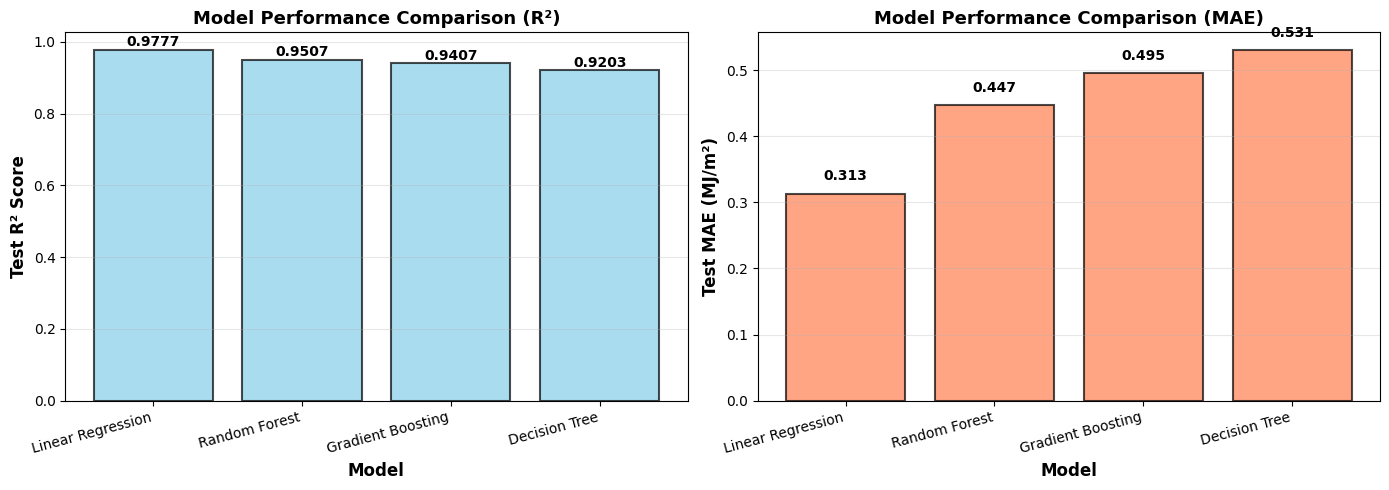

In [44]:
# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: R² Comparison
x_pos = range(len(comparison))
axes[0].bar(x_pos, comparison['Test_R2'], color='skyblue',
            edgecolor='black', linewidth=1.5, alpha=0.7)
axes[0].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Test R² Score', fontsize=12, fontweight='bold')
axes[0].set_title('Model Performance Comparison (R²)',
                  fontsize=13, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison['Model'], rotation=15, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(comparison['Test_R2']):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 2: MAE Comparison
axes[1].bar(x_pos, comparison['Test_MAE'], color='coral',
            edgecolor='black', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Test MAE (MJ/m²)', fontsize=12, fontweight='bold')
axes[1].set_title('Model Performance Comparison (MAE)',
                  fontsize=13, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison['Model'], rotation=15, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(comparison['Test_MAE']):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('Model_Comparison.png', dpi=300, bbox_inches='tight')
print("\n Saved: Model_Comparison.png")
plt.show()


Confirm Best Model and Prepare for Forecasting

In [47]:
print("="*70)
print("CELL: CONFIRM BEST MODEL FOR FORECASTING")
print("="*70)

# Display the best model from comparison
print(f"\nBest Performing Model: Linear Regression")
print(f"  Test R²: {test_r2:.4f}")
print(f"  Test MAE: {test_mae:.3f} MJ/m²")
print(f"  Test RMSE: {test_rmse:.3f} MJ/m²")

print("\nThis model will be used to generate 2026 forecasts.")
print("\n" + "="*70)

CELL: CONFIRM BEST MODEL FOR FORECASTING

Best Performing Model: Linear Regression
  Test R²: 0.9777
  Test MAE: 0.313 MJ/m²
  Test RMSE: 0.352 MJ/m²

This model will be used to generate 2026 forecasts.



Create 2026 Forecast Structure

In [48]:
# Create forecast for 2026 only (12 months)
forecast_data = []

for month in range(1, 13):
    forecast_data.append({
        'year': 2026,
        'month': month,
        'date': f'2026-{month:02d}-01'
    })

forecast_df = pd.DataFrame(forecast_data)
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

print(f"\n Forecast structure created")
print(f"   Year: 2026")
print(f"   Total months: {len(forecast_df)}")
print(f"   Date range: {forecast_df['date'].min()} to {forecast_df['date'].max()}")



 Forecast structure created
   Year: 2026
   Total months: 12
   Date range: 2026-01-01 00:00:00 to 2026-12-01 00:00:00


In [49]:
print("="*70)
print("CREATING 2026 FORECAST - CORRECT METHOD")
print("="*70)

# Step 1: Create forecast structure (12 months for 2026)
forecast_data = []

for month in range(1, 13):
    forecast_data.append({
        'year': 2026,
        'month': month,
        'date': f'2026-{month:02d}-01'
    })

forecast_df = pd.DataFrame(forecast_data)
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

print(f"\n✅ Forecast structure created")
print(f"   Year: 2026")
print(f"   Total months: {len(forecast_df)}")
print(f"   Date range: {forecast_df['date'].min()} to {forecast_df['date'].max()}")

# Step 2: Calculate AVERAGE historical patterns per month (THIS IS THE KEY!)
print("\n📊 Calculating historical monthly averages...")
historical_monthly_avg = monthly_data.groupby('month')[feature_columns].mean().reset_index()

print("\n✅ Historical monthly averages calculated:")
print(f"   Shape: {historical_monthly_avg.shape}")  # Should be (12, 6) - 12 months, 5 features + month
print("\nPreview:")
print(historical_monthly_avg.head())

# Step 3: Merge forecast with AVERAGED historical patterns
forecast_df = forecast_df.merge(
    historical_monthly_avg,
    on='month',
    how='left'
)

print(f"\n✅ Historical weather patterns added")
print(f"   Final forecast dataframe shape: {forecast_df.shape}")  # Should be (12, X)
print(f"   Total rows: {len(forecast_df)}")  # Should be 12!

print("\n📋 Forecast data preview:")
print(forecast_df[['date', 'month', 'uvindex', 'cloudcover', 'humidity', 'temp', 'precipcover']])

# Step 4: Prepare features for prediction
X_forecast = forecast_df[feature_columns]

print("\n🎯 Features prepared for prediction:")
print(f"   Shape: {X_forecast.shape}")  # Should be (12, 5)

# Step 5: Make predictions using best model
forecast_df['predicted_solar'] = model_lr.predict(X_forecast)

print("\n✅ Solar energy predictions generated")

# Step 6: Add additional context
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

forecast_df['month_name'] = [month_names[m-1] for m in forecast_df['month']]

# Step 7: Display results
print("\n" + "="*70)
print("2026 MONTHLY FORECASTS")
print("="*70)
for idx, row in forecast_df.iterrows():
    print(f"  {row['month_name']:12s} 2026: {row['predicted_solar']:5.2f} MJ/m²")
# Summary statistics
print("\n" + "="*70)
print("2026 SUMMARY STATISTICS")
print("="*70)
mean_2026 = forecast_df['predicted_solar'].mean()
min_2026 = forecast_df['predicted_solar'].min()
max_2026 = forecast_df['predicted_solar'].max()
min_month = forecast_df.loc[forecast_df['predicted_solar'].idxmin(), 'month_name']
max_month = forecast_df.loc[forecast_df['predicted_solar'].idxmax(), 'month_name']

print(f"  Mean:   {mean_2026:.2f} MJ/m²")
print(f"  Min:    {min_2026:.2f} MJ/m² ({min_month})")
print(f"  Max:    {max_2026:.2f} MJ/m² ({max_month})")
print(f"  Range:  {max_2026 - min_2026:.2f} MJ/m²")
print(f"  Std:    {forecast_df['predicted_solar'].std():.2f} MJ/m²")

# Step 8: Save to CSV
forecast_df.to_csv('Forecast_2026_Colombo04.csv', index=False)

print("\n" + "="*70)
print("✅ FORECAST SAVED")
print("="*70)
print(f"   File: Forecast_2026_Colombo04.csv")
print(f"   Rows: {len(forecast_df)} (should be 12!)")
print(f"   Columns: {len(forecast_df.columns)}")
print("="*70)

# Verify the CSV
print("\n🔍 CSV VERIFICATION:")
test_read = pd.read_csv('Forecast_2026_Colombo04.csv')
print(f"   CSV contains {len(test_read)} rows ✅" if len(test_read) == 12 else f"   ⚠️ WARNING: CSV has {len(test_read)} rows instead of 12!")

print("\n" + "="*70)

CREATING 2026 FORECAST - CORRECT METHOD

✅ Forecast structure created
   Year: 2026
   Total months: 12
   Date range: 2026-01-01 00:00:00 to 2026-12-01 00:00:00

📊 Calculating historical monthly averages...

✅ Historical monthly averages calculated:
   Shape: (12, 6)

Preview:
   month   uvindex  cloudcover   humidity       temp  precipcover
0      1  7.767742   48.983871  78.845806  80.530323      160.012
1      2  8.998768   36.908424  73.965961  81.973867       64.180
2      3  8.935484   40.402581  78.846452  82.683226      183.356
3      4  8.593333   45.150667  80.778000  83.521333      253.348
4      5  7.303226   57.704516  82.730968  83.519355      466.672

✅ Historical weather patterns added
   Final forecast dataframe shape: (12, 8)
   Total rows: 12

📋 Forecast data preview:
         date  month   uvindex  cloudcover   humidity       temp  precipcover
0  2026-01-01      1  7.767742   48.983871  78.845806  80.530323      160.012
1  2026-02-01      2  8.998768   36.908424  7

Predict Solar Energy for 2026

In [50]:
# Prepare features for prediction
X_forecast = forecast_df[feature_columns]

# Use Linear Regression (best model) to predict
forecast_df['predicted_solar'] = model_lr.predict(X_forecast)

print("\n Solar energy predictions generated")
print(f"  Total predictions: {len(forecast_df)} months")

print("\n 2026 MONTHLY FORECASTS:")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for idx, row in forecast_df.iterrows():
    month_name = month_names[row['month']-1]
    print(f"   {month_name} 2026: {row['predicted_solar']:5.2f} MJ/m²")

# Summary statistics
mean_2026 = forecast_df['predicted_solar'].mean()
min_2026 = forecast_df['predicted_solar'].min()
max_2026 = forecast_df['predicted_solar'].max()

print("\n 2026 SUMMARY:")
print(f"   Mean:  {mean_2026:.2f} MJ/m²")
print(f"   Min:   {min_2026:.2f} MJ/m² ({month_names[forecast_df.loc[forecast_df['predicted_solar'].idxmin(), 'month'] - 1]}) ")
print(f"   Max:   {max_2026:.2f} MJ/m² ({month_names[forecast_df.loc[forecast_df['predicted_solar'].idxmax(), 'month'] - 1]}) ")


 Solar energy predictions generated
  Total predictions: 12 months

 2026 MONTHLY FORECASTS:
   Jan 2026: 18.26 MJ/m²
   Feb 2026: 22.17 MJ/m²
   Mar 2026: 21.88 MJ/m²
   Apr 2026: 20.99 MJ/m²
   May 2026: 17.33 MJ/m²
   Jun 2026: 17.70 MJ/m²
   Jul 2026: 18.08 MJ/m²
   Aug 2026: 19.01 MJ/m²
   Sep 2026: 18.74 MJ/m²
   Oct 2026: 16.72 MJ/m²
   Nov 2026: 15.18 MJ/m²
   Dec 2026: 17.43 MJ/m²

 2026 SUMMARY:
   Mean:  18.62 MJ/m²
   Min:   15.18 MJ/m² (Nov) 
   Max:   22.17 MJ/m² (Feb) 


Add Month Names and Seasons

In [51]:
# Add month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
forecast_df['month_name'] = forecast_df['month'].apply(lambda x: month_names[x-1])

# Add seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'NE Monsoon'
    elif month in [3, 4]:
        return 'Inter-Monsoon 1'
    elif month in [5, 6, 7, 8, 9]:
        return 'SW Monsoon'
    else:
        return 'Inter-Monsoon 2'

forecast_df['season'] = forecast_df['month'].apply(assign_season)

print("\n Month names and seasons added")

print("\n Complete forecast preview:")
print(forecast_df[['date', 'month_name', 'season', 'predicted_solar']].to_string(index=False))



 Month names and seasons added

 Complete forecast preview:
      date month_name          season  predicted_solar
2026-01-01        Jan      NE Monsoon        18.256350
2026-02-01        Feb      NE Monsoon        22.174336
2026-03-01        Mar Inter-Monsoon 1        21.879149
2026-04-01        Apr Inter-Monsoon 1        20.991992
2026-05-01        May      SW Monsoon        17.325158
2026-06-01        Jun      SW Monsoon        17.698745
2026-07-01        Jul      SW Monsoon        18.083160
2026-08-01        Aug      SW Monsoon        19.008014
2026-09-01        Sep      SW Monsoon        18.739437
2026-10-01        Oct Inter-Monsoon 2        16.723237
2026-11-01        Nov Inter-Monsoon 2        15.184270
2026-12-01        Dec      NE Monsoon        17.429297


Visual on the focast


 Saved: 2026_Forecast.png


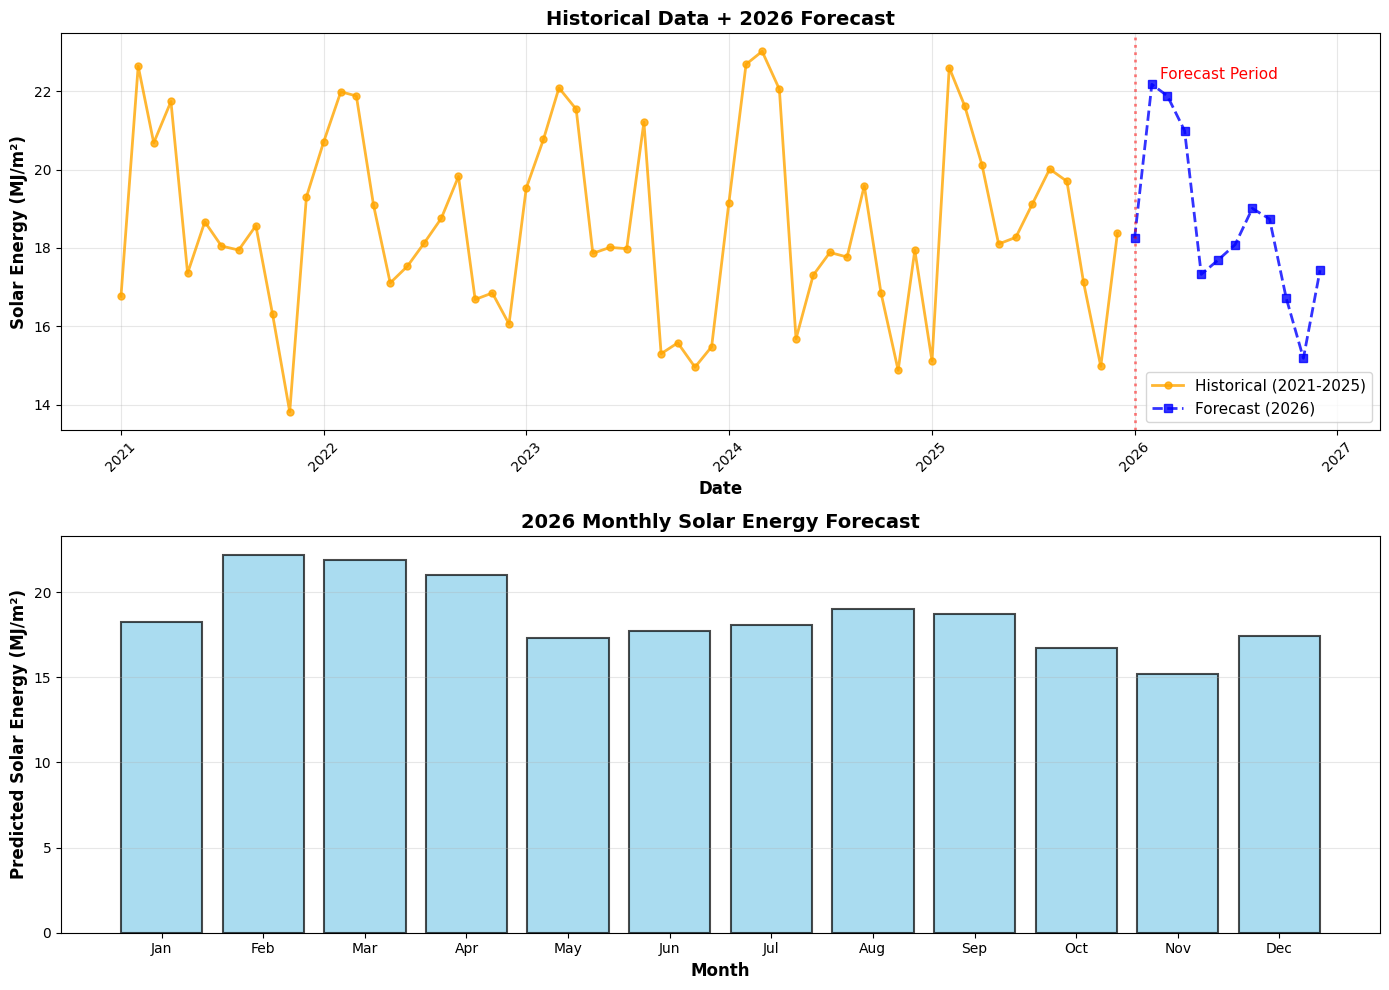

In [52]:
# Create forecast visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Historical + Forecast
axes[0].plot(monthly_data['date'], monthly_data['solarenergy'],
             'o-', linewidth=2, markersize=5, color='orange',
             label='Historical (2021-2025)', alpha=0.8)
axes[0].plot(forecast_df['date'], forecast_df['predicted_solar'],
             's--', linewidth=2, markersize=6, color='blue',
             label='Forecast (2026)', alpha=0.8)
axes[0].axvline(x=pd.Timestamp('2026-01-01'), color='red',
                linestyle=':', linewidth=2, alpha=0.5)
axes[0].text(pd.Timestamp('2026-06-01'), axes[0].get_ylim()[1]*0.95,
             'Forecast Period', fontsize=11, ha='center', color='red')

axes[0].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Solar Energy (MJ/m²)', fontsize=12, fontweight='bold')
axes[0].set_title('Historical Data + 2026 Forecast',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: 2026 Monthly Forecast
axes[1].bar(forecast_df['month'], forecast_df['predicted_solar'],
            color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Solar Energy (MJ/m²)', fontsize=12, fontweight='bold')
axes[1].set_title('2026 Monthly Solar Energy Forecast',
                  fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('2026_Forecast.png', dpi=300, bbox_inches='tight')
print("\n Saved: 2026_Forecast.png")
plt.show()


Save 2026 Forecast Data

In [53]:
# Save forecast to CSV
forecast_df.to_csv('Forecast_2026_Colombo04.csv', index=False)

print("\n Saved: Forecast_2026_Colombo04.csv")

print("\n FORECAST SUMMARY:")
print(f"   Year: 2026")
print(f"   Months: {len(forecast_df)}")
print(f"   Mean Solar: {forecast_df['predicted_solar'].mean():.2f} MJ/m²")
print(f"   Min Solar: {forecast_df['predicted_solar'].min():.2f} MJ/m²")
print(f"   Max Solar: {forecast_df['predicted_solar'].max():.2f} MJ/m²")



 Saved: Forecast_2026_Colombo04.csv

 FORECAST SUMMARY:
   Year: 2026
   Months: 12
   Mean Solar: 18.62 MJ/m²
   Min Solar: 15.18 MJ/m²
   Max Solar: 22.17 MJ/m²


In [54]:
# AUTO-ADD HISTORICAL SOLAR DATA

# Load forecast from CSV
import pandas as pd

try:
    print("✅ Using existing forecast_df")
    # No 'pass' needed here; execution continues
except NameError:
    forecast_df = pd.read_csv('Forecast_2026_Colombo04.csv')
    print("✅ Loaded from CSV")

# Remove any existing historical columns from a previous run before re-joining
cols_to_drop = [col for col in forecast_df.columns if col.startswith('historical_')]
if cols_to_drop:
    forecast_df = forecast_df.drop(columns=cols_to_drop)
    print(f"✅ Dropped existing historical columns: {cols_to_drop}")


# Calculate historical statistics
historical_solar_stats = monthly_data.groupby('month')['solarenergy'].agg([
    ('historical_avg', 'mean'),
    ('historical_std', 'std'),
    ('historical_min', 'min'),
    ('historical_max', 'max')
]).reset_index()

print(f"✅ Calculated historical stats for {len(historical_solar_stats)} months")

# Merge with forecast using set_index().join() for robustness
# This ensures that 'month' is the key for joining
forecast_df = forecast_df.set_index('month').join(historical_solar_stats.set_index('month'), how='left').reset_index()

# Add comparison columns
forecast_df['difference_from_historical'] = (
    forecast_df['predicted_solar'] - forecast_df['historical_avg']
).round(2)

forecast_df['percent_difference'] = (
    (forecast_df['difference_from_historical'] / forecast_df['historical_avg']) * 100
).round(1)

# Save enhanced CSV
forecast_df.to_csv('Forecast_2026_with_Historical.csv', index=False)


# Display results
display_cols = ['month_name', 'predicted_solar', 'historical_avg', 'difference_from_historical']
print(forecast_df[display_cols].to_string(index=False))


✅ Using existing forecast_df
✅ Calculated historical stats for 12 months
month_name  predicted_solar  historical_avg  difference_from_historical
       Jan        18.256350       18.249677                        0.01
       Feb        22.174336       22.135813                        0.04
       Mar        21.879149       21.855484                        0.02
       Apr        20.991992       20.906667                        0.09
       May        17.325158       17.220645                        0.10
       Jun        17.698745       17.957333                       -0.26
       Jul        18.083160       18.232258                       -0.15
       Aug        19.008014       19.138065                       -0.13
       Sep        18.739437       18.595333                        0.14
       Oct        16.723237       16.509677                        0.21
       Nov        15.184270       15.095333                        0.09
       Dec        17.429297       17.429677                    

In [55]:
from google.colab import files

# Download the forecast CSV
files.download('Forecast_2026_Colombo04.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>